In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [13]:
import Shuffling as sf
token , pattern_id = sf.pattern()
token, pattern_id

('8097114971151041171149710997', 6)

In [14]:
Pattern_dict = { 1 : "Shuffling", 2 : "Flipping"}
Pattern = np.random.randint(1,3)
Pattern

1

In [15]:
def enter_data(pattern_data):
    qr_nameA, cru_qr_name, PatternA, tokkenA, pattern_idA = pattern_data.strip().split(",")

    with open("Data.txt", 'r+') as file:
        lines = file.readlines()  # Read all lines into a list
        for line in lines:
            if qr_nameA in line:
                print(f"{qr_nameA} already exists in the file.")
                return
        
        # If qr_nameA does not exist, append the new data
        file.write(pattern_data + "\n")
        print(f"{qr_nameA} has been added to the file.")

In [16]:
qr_name = "hash_qr_code[1].png"
save_qr = "Crumbled "+ qr_name
save_qr

'Crumbled hash_qr_code[1].png'

In [17]:
pattern_data = qr_name +","+ save_qr + ","+Pattern_dict[Pattern] + "," + token + ","+ str(pattern_id) 

In [18]:
pattern_data

'hash_qr_code[1].png,Crumbled hash_qr_code[1].png,Shuffling,8097114971151041171149710997,6'

In [19]:
enter_data(pattern_data)

hash_qr_code[1].png has been added to the file.


80971149711510411711497109978097114971151041171149710997809711497115104117114971099780971149711510411711497109978097114971151041171149710997809711497115104117114971099780971149711510411711497109978097114971151041171149710997809711497115104117114971099780971149711510411711497109978097114971151041171149710997809711497115104117114971099780971149711510411711497109978097114971151041171149710997


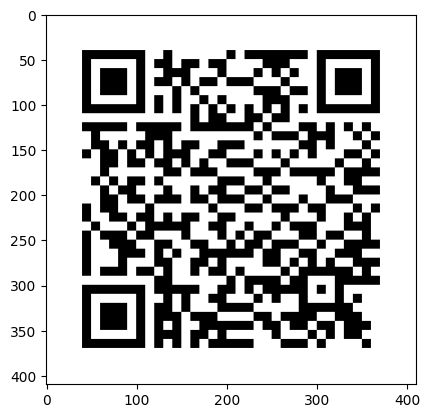

In [20]:
qr1 = cv2.imread(qr_name,-1)
plt.imshow(qr1,cmap='gray')
t_h,t_w = sf.tokkenning(token,qr1.shape[0],qr1.shape[1])

In [21]:
len(t_h), len(t_w)

(410, 410)

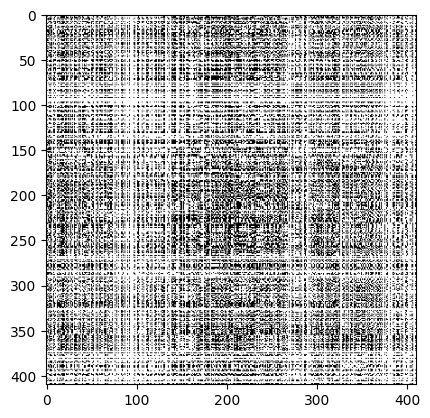

In [22]:
if Pattern == 1:
    for i in range(500):
        qr1 = sf.row_top_down(qr1,t_h)
    for i in range(500):
        qr1 = sf.col_left_right(qr1,t_w)
    plt.imsave(save_qr , qr1, cmap='gray')
    plt.imshow(qr1,cmap='gray')
else:
    import Flipping as fl
    for i in range(500):
        qr1 = fl.Down(fl.Right(fl.Up(fl.Left(qr1,t_h),t_w),t_h),t_w)
    plt.imsave(save_qr , qr1, cmap='gray')
    plt.imshow(qr1,cmap='gray')